In [ ]:
!pip install torch -q
!pip install transformers -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import re
import nltk

nltk.download('punkt_tab')

pd.set_option('display.max_colwidth', None)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
stopword = []
with open('/content/stopwords.txt', 'r',encoding='utf-8') as file:
    for word in file:
        stopword.append(word.strip())

slangwords = {}
with open('/content/slangwords.txt', 'r',encoding='utf-8') as file:
    for line in file:
        words = line.split(",")
        old = words[0].strip()
        new = words[1].strip()
        slangwords[old] = new


In [ ]:
df = pd.read_excel('/content/sampel_data_semifinal_satria_data_2024.xlsx')

# Initial Data Preparation

In [ ]:
df.head()

,created_at,tcode,num_retweets,type,frn_cnt,flw_cnt,sts_cnt,loc,lst_cnt,content,lang
0,2024-01-04 16:57:09,rt,1248.0,twit,266.0,107.0,9687.0,NaN,0.0,RT K-Popers Berencana Kirim Food Truck untuk Anies Baswedan di Acara Desak Anies https://t.co/xp14zfSsTw #TempoSeleb [RE tempodotco],id
1,2024-01-04 16:57:09,rt,195.0,twit,564.0,303.0,12461.0,indonesia kaya,2.0,RT Bapak Pendeta Yusak ini Dari Magetan ke Ponorogo Jawa timur hadir Untuk Memberikan Dukungan ke Pak Anies Baswedan ....masihkah Kalian Memfitnah Pak Anies Intoleransi dan Radikal -Radikul ???? https://t.co/K7hxibOQUl [RE Yurissa_Samosir],id
2,2024-01-04 16:57:10,rt,116.0,twit,376.0,156.0,7488.0,Indonesia,1.0,"RT Viral , Gimana Mak Mak di jakarta tidak ter Anies Anies ... https://t.co/sBVNn8To6Q https://t.co/r9yzB8jKP4 [RE STresnowati1]",id
3,2024-01-04 16:57:10,rt,2264.0,twit,163.0,203.0,2065.0,NaN,0.0,"RT Mendengar Pak Anies disini, rasanya saya sudah berada di perahu yang tepat. Menurut saya, Pak Anies adalah pemimpin berpengalaman dan berani yg memang sudah sering menemui bahkan menyelesaikan berbagai persoalanÂ² yg nyata betul ada di kehidupan bermasyarakat. Bagaimana menurut kawanÂ² semua? ----Â Listening to Pak Anies here, I know I am in the right boat. Pak Anies is an experienced and courageous leader who has frequently encountered and then resolved real problems in our communities. What do you guys think? Â https://t.co/FSrKfEOI4r [RE tomlembong]",id
4,2024-01-04 16:57:11,rt,1157.0,twit,1.0,1.0,798.0,NaN,0.0,RT Media Asing Soroti Cara Anies Gaet Pemilih Muda Pakai 'Desak Anies' https://t.co/UYEMKs4Q10 [RE CNNIndonesia],id


In [ ]:
df['lang'].value_counts()

,count
lang,
id,49979


In [ ]:
df.drop(columns=['lang','type','loc'],inplace=True)

In [ ]:
df.isnull().sum()

,0
created_at,13
tcode,7
num_retweets,13
frn_cnt,13
flw_cnt,13
sts_cnt,13
lst_cnt,21
content,21


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(49940, 8)

<Axes: title={'center': 'Created At Hour Distribution'}, xlabel='created_at'>

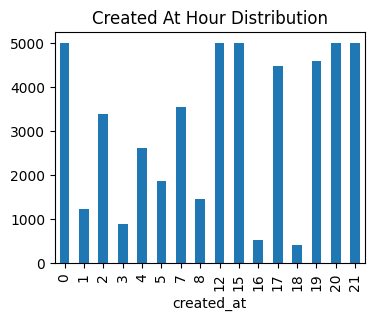

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['created_at'].dt.hour.value_counts().sort_index().plot(kind='bar', figsize=(4, 3), title='Created At Hour Distribution')

<Axes: title={'center': 'Created At Hour Distribution'}, xlabel='created_at'>

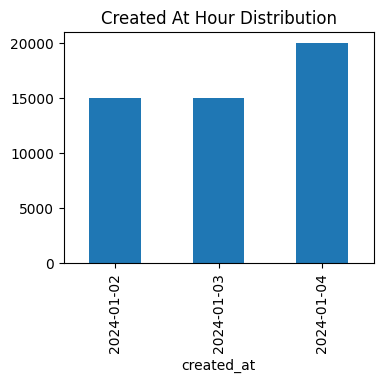

In [ ]:
df['created_at'].dt.date.value_counts().sort_index().plot(kind='bar', figsize=(4, 3), title='Created At Hour Distribution')

In [ ]:
def filtering(review, remove_numbers=True):

    #remove retweet tags dalam bentuk RT
    review = re.sub(r'RT', '', review)
    #remove reply tags dalam bentuk [RE {username}]
    review = re.sub(r'\[RE \w+\]', '', review)

    review = re.sub(r'@\S+', ' ', review)
    review = re.sub(r'@[\w\.]+\b', ' ', review)
    review = re.sub(r'@\w+', ' ', review)

    # Menghapus URL
    review = re.sub(r'https?://\S+', ' ', review)
    review = re.sub(r'\S*\.(com|org|co)/\w*\b', ' ', review)

    review = re.sub(r"[.,:;]", " ", review)

    # Menghapus kata setelah tanda pagar (#) hanya jika jumlah hashtag tepat 3
    hashtags = re.findall(r'#([^\s]+)', review)
    for hashtag in hashtags:
        review = re.sub(r'#' + re.escape(hashtag) + r'\b', ' ', review)

    review = re.sub(r"\d", " ", review) if remove_numbers else review
    review = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\*]", " ", review)
    review = re.sub(r'[^\x00-\x7f]', r' ', review)
    review = re.sub(r'(\\u[0-9A-Fa-f]+)', r' ', review)
    review = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", review)
    review = re.sub(r'\\u\w\w\w\w', ' ', review)
    review = re.sub(r'@\w+\b', ' ', review)
    review = re.sub(r'\s+', ' ', review)

    # remove some words
    rmv = ['a', 'href', 'quot']
    review = word_tokenize(review)
    review = [str(token).strip() for token in review if token not in rmv]
    review = ' '.join(review)

    return review

def convertToSlangword(review):
    review = review.split()
    content = []
    for kata in review:
        if kata in slangwords:
            new_kata = slangwords[kata]
        else:
            new_kata = kata
        content.append(new_kata.lower())
    return ' '.join(content)

df['content_cleaned'] = df['content'].apply(lambda x: filtering(x, remove_numbers=True))
df['content_cleaned'] = df['content_cleaned'].apply(lambda x: convertToSlangword(x))

In [ ]:
df[['content','content_cleaned']].head()

,content,content_cleaned
0,RT K-Popers Berencana Kirim Food Truck untuk Anies Baswedan di Acara Desak Anies https://t.co/xp14zfSsTw #TempoSeleb [RE tempodotco],k popers berencana kirim food truck untuk anies baswedan di acara desak anies
1,RT Bapak Pendeta Yusak ini Dari Magetan ke Ponorogo Jawa timur hadir Untuk Memberikan Dukungan ke Pak Anies Baswedan ....masihkah Kalian Memfitnah Pak Anies Intoleransi dan Radikal -Radikul ???? https://t.co/K7hxibOQUl [RE Yurissa_Samosir],bapak pendeta yusak ini dari magetan ke ponorogo jawa timur hadir untuk memberikan dukungan ke pak anies baswedan masihkah kalian memfitnah pak anies intoleransi dan radikal radikul
2,"RT Viral , Gimana Mak Mak di jakarta tidak ter Anies Anies ... https://t.co/sBVNn8To6Q https://t.co/r9yzB8jKP4 [RE STresnowati1]",viral gimana mak mak di jakarta tidak ter anies anies
3,"RT Mendengar Pak Anies disini, rasanya saya sudah berada di perahu yang tepat. Menurut saya, Pak Anies adalah pemimpin berpengalaman dan berani yg memang sudah sering menemui bahkan menyelesaikan berbagai persoalanÂ² yg nyata betul ada di kehidupan bermasyarakat. Bagaimana menurut kawanÂ² semua? ----Â Listening to Pak Anies here, I know I am in the right boat. Pak Anies is an experienced and courageous leader who has frequently encountered and then resolved real problems in our communities. What do you guys think? Â https://t.co/FSrKfEOI4r [RE tomlembong]",mendengar pak anies di sini rasanya saya sudah ada di perahu yang tepat menurut saya pak anies adalah pimpin berpengalaman dan berani yang memang sudah sering menemui bahkan menyelesaikan bagai soal yang nyata betul ada di hidup bermasyarakat bagaimana turut kawan semua listening to pak anies here i know i am in the right boat pak anies is an experienced and courageous leader who has frequently encountered and then resolved real problems in our communities what do kamu guys think
4,RT Media Asing Soroti Cara Anies Gaet Pemilih Muda Pakai 'Desak Anies' https://t.co/UYEMKs4Q10 [RE CNNIndonesia],media asing soroti cara anies gaet pemilih muda pakai desak anies


In [ ]:
df.to_csv('cleaned.csv',sep=';')

# Adding entity

In [ ]:
def cari_kandidat(teks):
    keywords = {
      'Anies-Muhaimin': ['anies', 'baswedan', 'abw', 'muhaimin', 'iskandar', 'imin', 'cak imin', 'amin'],
      'Prabowo-Gibran': ['prabowo', 'subianto', 'ps', 'gibran', 'rakabuming'],
      'Ganjar-Mahfud': ['ganjar', 'pranowo', 'gp', 'mahfud', 'md']
    }
    kandidat_ditemukan = []
    teks_lower = str(teks).lower()

    for kandidat, keywords in keywords.items():
        if any(keyword in teks_lower for keyword in keywords):
            kandidat_ditemukan.append(kandidat)

    return kandidat_ditemukan if kandidat_ditemukan else None

In [ ]:
df['kandidat'] = df['content_cleaned'].apply(cari_kandidat)

In [ ]:
df['kandidat'].value_counts()

,count
kandidat,
[Anies-Muhaimin],19110
[Ganjar-Mahfud],14364
[Prabowo-Gibran],10792
"[Prabowo-Gibran, Ganjar-Mahfud]",1492
"[Anies-Muhaimin, Prabowo-Gibran]",1439
"[Anies-Muhaimin, Prabowo-Gibran, Ganjar-Mahfud]",530
"[Anies-Muhaimin, Ganjar-Mahfud]",524


In [ ]:
df['kandidat'].isnull().sum()

np.int64(1689)

In [ ]:
df.dropna(inplace =True)

In [ ]:
!pip install keybert -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.5 MB/s eta 0:00:00


In [ ]:
from keybert import KeyBERT

kw_model = KeyBERT()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from tqdm.auto import tqdm
tqdm.pandas(desc="Ekstraksi Aspek via KeyBERT")

def extract_key_aspects(text):
    if not isinstance(text, str) or len(text.strip()) < 5:
        return None

    try:
        keywords = kw_model.extract_keywords(
            text,
            keyphrase_ngram_range=(1, 3),
            stop_words='english',
            top_n=3
        )

        return [kw[0] for kw in keywords]

    except Exception as e:
        print(f"Error processing text: {text[:50]}... | Error: {e}")
        return None

df['keybert_keywords'] = df['content_cleaned'].progress_apply(extract_key_aspects)

Ekstraksi Aspek via KeyBERT:   0%|          | 0/48251 [00:00<?, ?it/s]

In [ ]:
!pip install sentence-transformers -q

In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

aspek_descriptions = {
    'Program': 'program kerja janji visi misi kebijakan solusi kesejahteraan sosial',
    'Kinerja': 'kinerja prestasi hasil kerja rekam jejak pembangunan infrastruktur membangun negara',
    'Sikap/Personalitas': 'sikap sifat karakter pribadi jujur tegas santun emosi wibawa beretika moral',
    'Komunikasi': 'debat bicara orasi gaya komunikasi diskusi gagasan cara menyampaikan pendapat',
    'Integritas': 'korupsi bersih amanah anti kkn nepotisme dinasti politik berintegritas'
}

aspek_vectors = {aspect: model.encode(desc) for aspect, desc in aspek_descriptions.items()}

print("Vektor untuk setiap aspek berhasil dibuat.")

Vektor untuk setiap aspek berhasil dibuat.


In [ ]:
def map_keywords_to_aspects_semantic(keywords_list, similarity_threshold=0.1):
    if keywords_list is None:
        return None

    found_aspects = set()

    for keyword_phrase in keywords_list:
        keyword_vector = model.encode(keyword_phrase)

        best_aspect = None
        highest_similarity = -1

        for aspect, aspect_vec in aspek_vectors.items():
            similarity = util.cos_sim(keyword_vector, aspect_vec)

            if similarity > highest_similarity:
                highest_similarity = similarity
                best_aspect = aspect

        found_aspects.add(best_aspect)

    return list(found_aspects) if found_aspects else None

In [ ]:
from tqdm.auto import tqdm


In [ ]:
df.to_csv('keywords.csv',sep=';')

In [ ]:
import pandas as pd
from tqdm.auto import tqdm


tqdm.pandas(desc="Mapping Keywords to Aspects")

df['aspect'] = df['keybert_keywords'].progress_apply(map_keywords_to_aspects_semantic)

# Tampilkan hasilnya
df[['content_cleaned', 'keybert_keywords', 'aspect']].dropna().head()

Mapping Keywords to Aspects:   0%|          | 0/48251 [00:00<?, ?it/s]

,content_cleaned,keybert_keywords,aspect
0,k popers berencana kirim food truck untuk anies baswedan di acara desak anies,"[food truck untuk, anies baswedan di, untuk anies baswedan]","[Program, Kinerja, Integritas]"
1,bapak pendeta yusak ini dari magetan ke ponorogo jawa timur hadir untuk memberikan dukungan ke pak anies baswedan masihkah kalian memfitnah pak anies intoleransi dan radikal radikul,"[dukungan ke pak, kalian memfitnah pak, bapak pendeta yusak]","[Komunikasi, Kinerja]"
2,viral gimana mak mak di jakarta tidak ter anies anies,"[di jakarta tidak, mak di jakarta, jakarta tidak ter]","[Komunikasi, Kinerja]"
3,mendengar pak anies di sini rasanya saya sudah ada di perahu yang tepat menurut saya pak anies adalah pimpin berpengalaman dan berani yang memang sudah sering menemui bahkan menyelesaikan bagai soal yang nyata betul ada di hidup bermasyarakat bagaimana turut kawan semua listening to pak anies here i know i am in the right boat pak anies is an experienced and courageous leader who has frequently encountered and then resolved real problems in our communities what do kamu guys think,"[pak anies adalah, saya pak anies, pak anies experienced]","[Komunikasi, Program, Integritas]"
4,media asing soroti cara anies gaet pemilih muda pakai desak anies,"[gaet pemilih muda, pemilih muda pakai, media asing soroti]","[Komunikasi, Program]"


In [ ]:
df.to_csv('aspect.csv',sep=';')

In [ ]:
from transformers import pipeline
from tqdm.auto import tqdm

emotion_analyzer = pipeline(
    "text-classification",
    model="w11wo/indonesian-roberta-base-sentiment-classifier"
)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
def perform_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return None

    try:
        result = emotion_analyzer(
            text,
            truncation=True,
            max_length=512
        )
        label = result[0]['label']
        return label

    except Exception as e:
        print(f"Error analyzing sentiment for text: {text[:50]}... | Error: {e}")
        return None

In [ ]:
df['sentiment'] = df['content_cleaned'].progress_apply(perform_sentiment)

Mapping Keywords to Aspects:   0%|          | 0/48251 [00:00<?, ?it/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
df.sample(2)

,created_at,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,lst_cnt,content,content_cleaned,kandidat,keybert_keywords,aspect,sentiment
15307,2024-01-03 12:05:57,mention,0.0,72.0,1.0,835.0,0.0,"PolJokesID bicara dgn pengalaman di jkt, ganjar pengalaman di jateng dan nebeng jokowið¤£ð¤£ð¤£ð¤£ Mahfud Hebat #L3bihbaik #MahfudLebihBaik3 #GanjarMahfud2024 Buruh Naik Kelas",poljokesid bicara dengan pengalaman di jakarta ganjar pengalaman di jawa tengah dan nebeng jokowi mahfud hebat buruh naik kelas,[Ganjar-Mahfud],"[pengalaman di jakarta, jakarta ganjar pengalaman, bicara dengan pengalaman]","[Komunikasi, Kinerja]",neutral
27373,2024-01-02 19:17:40,rt,4781.0,885.0,202.0,8862.0,1.0,RT [Desak Anies] EVENT NOTICE 2024. 01. 03(ì) â­ ì¥ì Istana Basa Pagaruyung â° ìê° 09:30 (WIB) #Anies #ìëì¤ #DesakAnies https://t.co/fXnw3h13bO [RE aniesbubble],desak anies event notice istana basa pagaruyung wib,[Anies-Muhaimin],"[event notice istana, desak anies event, anies event notice]","[Program, Integritas]",neutral


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
neutral,22985
positive,15164
negative,10102


In [ ]:
df['aspect_index_0'] = df['aspect'].str[0]

In [ ]:
df['aspect_index_0'].value_counts()

,count
aspect_index_0,
Komunikasi,27848
Kinerja,10824
Program,6956
Integritas,1362
Sikap/Personalitas,1258


In [ ]:
df.head()

,created_at,tcode,num_retweets,frn_cnt,flw_cnt,sts_cnt,lst_cnt,content,content_cleaned,kandidat,keybert_keywords,aspect,sentiment,aspect_index_0
0,2024-01-04 16:57:09,rt,1248.0,266.0,107.0,9687.0,0.0,RT K-Popers Berencana Kirim Food Truck untuk Anies Baswedan di Acara Desak Anies https://t.co/xp14zfSsTw #TempoSeleb [RE tempodotco],k popers berencana kirim food truck untuk anies baswedan di acara desak anies,[Anies-Muhaimin],"[food truck untuk, anies baswedan di, untuk anies baswedan]","[Program, Kinerja, Integritas]",neutral,Program
1,2024-01-04 16:57:09,rt,195.0,564.0,303.0,12461.0,2.0,RT Bapak Pendeta Yusak ini Dari Magetan ke Ponorogo Jawa timur hadir Untuk Memberikan Dukungan ke Pak Anies Baswedan ....masihkah Kalian Memfitnah Pak Anies Intoleransi dan Radikal -Radikul ???? https://t.co/K7hxibOQUl [RE Yurissa_Samosir],bapak pendeta yusak ini dari magetan ke ponorogo jawa timur hadir untuk memberikan dukungan ke pak anies baswedan masihkah kalian memfitnah pak anies intoleransi dan radikal radikul,[Anies-Muhaimin],"[dukungan ke pak, kalian memfitnah pak, bapak pendeta yusak]","[Komunikasi, Kinerja]",negative,Komunikasi
2,2024-01-04 16:57:10,rt,116.0,376.0,156.0,7488.0,1.0,"RT Viral , Gimana Mak Mak di jakarta tidak ter Anies Anies ... https://t.co/sBVNn8To6Q https://t.co/r9yzB8jKP4 [RE STresnowati1]",viral gimana mak mak di jakarta tidak ter anies anies,[Anies-Muhaimin],"[di jakarta tidak, mak di jakarta, jakarta tidak ter]","[Komunikasi, Kinerja]",negative,Komunikasi
3,2024-01-04 16:57:10,rt,2264.0,163.0,203.0,2065.0,0.0,"RT Mendengar Pak Anies disini, rasanya saya sudah berada di perahu yang tepat. Menurut saya, Pak Anies adalah pemimpin berpengalaman dan berani yg memang sudah sering menemui bahkan menyelesaikan berbagai persoalanÂ² yg nyata betul ada di kehidupan bermasyarakat. Bagaimana menurut kawanÂ² semua? ----Â Listening to Pak Anies here, I know I am in the right boat. Pak Anies is an experienced and courageous leader who has frequently encountered and then resolved real problems in our communities. What do you guys think? Â https://t.co/FSrKfEOI4r [RE tomlembong]",mendengar pak anies di sini rasanya saya sudah ada di perahu yang tepat menurut saya pak anies adalah pimpin berpengalaman dan berani yang memang sudah sering menemui bahkan menyelesaikan bagai soal yang nyata betul ada di hidup bermasyarakat bagaimana turut kawan semua listening to pak anies here i know i am in the right boat pak anies is an experienced and courageous leader who has frequently encountered and then resolved real problems in our communities what do kamu guys think,[Anies-Muhaimin],"[pak anies adalah, saya pak anies, pak anies experienced]","[Komunikasi, Program, Integritas]",positive,Komunikasi
4,2024-01-04 16:57:11,rt,1157.0,1.0,1.0,798.0,0.0,RT Media Asing Soroti Cara Anies Gaet Pemilih Muda Pakai 'Desak Anies' https://t.co/UYEMKs4Q10 [RE CNNIndonesia],media asing soroti cara anies gaet pemilih muda pakai desak anies,[Anies-Muhaimin],"[gaet pemilih muda, pemilih muda pakai, media asing soroti]","[Komunikasi, Program]",negative,Komunikasi


In [ ]:
df_2 = df[['content_cleaned','kandidat','aspect_index_0','sentiment']]

In [ ]:
df_2

,content_cleaned,kandidat,aspect_index_0,sentiment
0,k popers berencana kirim food truck untuk anies baswedan di acara desak anies,[Anies-Muhaimin],Program,neutral
1,bapak pendeta yusak ini dari magetan ke ponorogo jawa timur hadir untuk memberikan dukungan ke pak anies baswedan masihkah kalian memfitnah pak anies intoleransi dan radikal radikul,[Anies-Muhaimin],Komunikasi,negative
2,viral gimana mak mak di jakarta tidak ter anies anies,[Anies-Muhaimin],Komunikasi,negative
3,mendengar pak anies di sini rasanya saya sudah ada di perahu yang tepat menurut saya pak anies adalah pimpin berpengalaman dan berani yang memang sudah sering menemui bahkan menyelesaikan bagai soal yang nyata betul ada di hidup bermasyarakat bagaimana turut kawan semua listening to pak anies here i know i am in the right boat pak anies is an experienced and courageous leader who has frequently encountered and then resolved real problems in our communities what do kamu guys think,[Anies-Muhaimin],Komunikasi,positive
4,media asing soroti cara anies gaet pemilih muda pakai desak anies,[Anies-Muhaimin],Komunikasi,negative
...,...,...,...,...
49995,di sumbar kami mulai dengan desak anies edisi sumbar masyarakat minang selalu logis biasa dengan tukar pikiran musyawarah dan suasana itulah yang terbangun saat kami berdialog kami ingin sampaikan terima kasih kepada masyarakat minang yang kumpul sama di tanah datar untuk bahas soal soal kebangsaan dan kenegaraan insya allah lima prioritas program untuk provinsi sumbar dapat kami jalankan demi mewujudkan sejahtera untuk semua untuk paparan lengkap kena lima prioritas program teman teman bisa saksikan lalu youtube channel anies baswedan,[Anies-Muhaimin],Komunikasi,positive
49996,anies baswedan padahal gampang banget kalau mau lepas dari julukan bapak intoleransi atau bapak politik identitas tapi tidak mau karena masyarakat yang intoleran itu adalah lumbung suara dia payah,[Anies-Muhaimin],Komunikasi,negative
49997,dukungan penuh buat ganjar mahfud karena mereka sudah bukti bahwa janji janji mereka bukan sekedar omong kosong,[Ganjar-Mahfud],Kinerja,positive
49998,deputi hukum tpn ganjar mahfud todung mulya lubis ingat tim pemenangan daerah tpd untuk kumpul bukti dan dokumentasi kecurangan,[Ganjar-Mahfud],Kinerja,neutral


In [ ]:
df_2['kandidat'].value_counts()

,count
kandidat,
[Anies-Muhaimin],19110
[Ganjar-Mahfud],14364
[Prabowo-Gibran],10792
"[Prabowo-Gibran, Ganjar-Mahfud]",1492
"[Anies-Muhaimin, Prabowo-Gibran]",1439
"[Anies-Muhaimin, Prabowo-Gibran, Ganjar-Mahfud]",530
"[Anies-Muhaimin, Ganjar-Mahfud]",524


In [ ]:
type(df_2['kandidat'].iloc[0])

list

In [ ]:
def extract_candidates(candidates):
    if candidates and isinstance(candidates, list):
        # Extract all aspect labels from the list of tuples
        return ' '.join([candidate for candidate in candidates])
    return None

df_2['kandidat_2'] = df['kandidat'].apply(extract_candidates)

/tmp/ipython-input-312053403.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['kandidat_2'] = df['kandidat'].apply(extract_candidates)


In [ ]:
df_2 = df_2[['content_cleaned','kandidat_2','aspect_index_0','sentiment']]

In [ ]:
df_2.rename(columns={'kandidat_2':'kandidat','aspect_index_0':'aspect'},inplace=True)

/tmp/ipython-input-360372859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.rename(columns={'kandidat_2':'kandidat','aspect_index_0':'aspect'},inplace=True)


In [ ]:
df_2

,content_cleaned,kandidat,aspect,sentiment
0,k popers berencana kirim food truck untuk anies baswedan di acara desak anies,Anies-Muhaimin,Program,neutral
1,bapak pendeta yusak ini dari magetan ke ponorogo jawa timur hadir untuk memberikan dukungan ke pak anies baswedan masihkah kalian memfitnah pak anies intoleransi dan radikal radikul,Anies-Muhaimin,Komunikasi,negative
2,viral gimana mak mak di jakarta tidak ter anies anies,Anies-Muhaimin,Komunikasi,negative
3,mendengar pak anies di sini rasanya saya sudah ada di perahu yang tepat menurut saya pak anies adalah pimpin berpengalaman dan berani yang memang sudah sering menemui bahkan menyelesaikan bagai soal yang nyata betul ada di hidup bermasyarakat bagaimana turut kawan semua listening to pak anies here i know i am in the right boat pak anies is an experienced and courageous leader who has frequently encountered and then resolved real problems in our communities what do kamu guys think,Anies-Muhaimin,Komunikasi,positive
4,media asing soroti cara anies gaet pemilih muda pakai desak anies,Anies-Muhaimin,Komunikasi,negative
...,...,...,...,...
49995,di sumbar kami mulai dengan desak anies edisi sumbar masyarakat minang selalu logis biasa dengan tukar pikiran musyawarah dan suasana itulah yang terbangun saat kami berdialog kami ingin sampaikan terima kasih kepada masyarakat minang yang kumpul sama di tanah datar untuk bahas soal soal kebangsaan dan kenegaraan insya allah lima prioritas program untuk provinsi sumbar dapat kami jalankan demi mewujudkan sejahtera untuk semua untuk paparan lengkap kena lima prioritas program teman teman bisa saksikan lalu youtube channel anies baswedan,Anies-Muhaimin,Komunikasi,positive
49996,anies baswedan padahal gampang banget kalau mau lepas dari julukan bapak intoleransi atau bapak politik identitas tapi tidak mau karena masyarakat yang intoleran itu adalah lumbung suara dia payah,Anies-Muhaimin,Komunikasi,negative
49997,dukungan penuh buat ganjar mahfud karena mereka sudah bukti bahwa janji janji mereka bukan sekedar omong kosong,Ganjar-Mahfud,Kinerja,positive
49998,deputi hukum tpn ganjar mahfud todung mulya lubis ingat tim pemenangan daerah tpd untuk kumpul bukti dan dokumentasi kecurangan,Ganjar-Mahfud,Kinerja,neutral


In [ ]:
df_2['kandidat'].value_counts()

,count
kandidat,
Anies-Muhaimin,19110
Ganjar-Mahfud,14364
Prabowo-Gibran,10792
Prabowo-Gibran Ganjar-Mahfud,1492
Anies-Muhaimin Prabowo-Gibran,1439
Anies-Muhaimin Prabowo-Gibran Ganjar-Mahfud,530
Anies-Muhaimin Ganjar-Mahfud,524


In [ ]:
df_2 = df_2[(df_2['kandidat'] == 'Anies-Muhaimin') |
            (df_2['kandidat'] == 'Ganjar-Mahfud') |
            (df_2['kandidat'] == 'Prabowo-Gibran')]

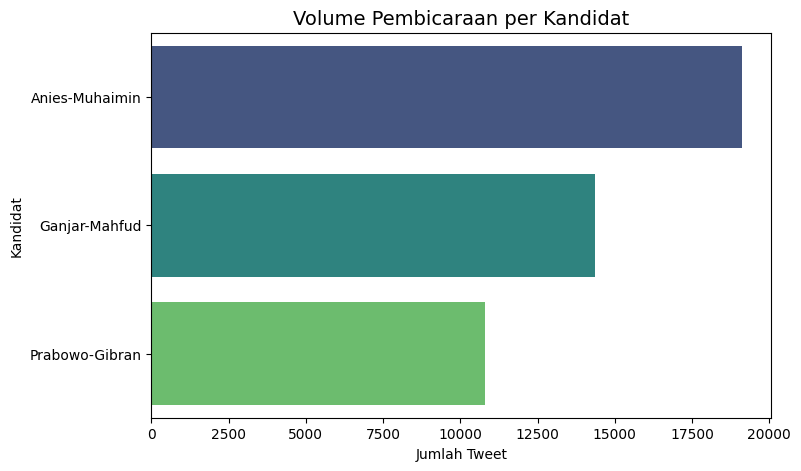

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_2,
    y='kandidat',
    order=df_2['kandidat'].value_counts().index,
    palette='viridis'
)
plt.title('Volume Pembicaraan per Kandidat', fontsize=14)
plt.xlabel('Jumlah Tweet')
plt.ylabel('Kandidat')
plt.show()

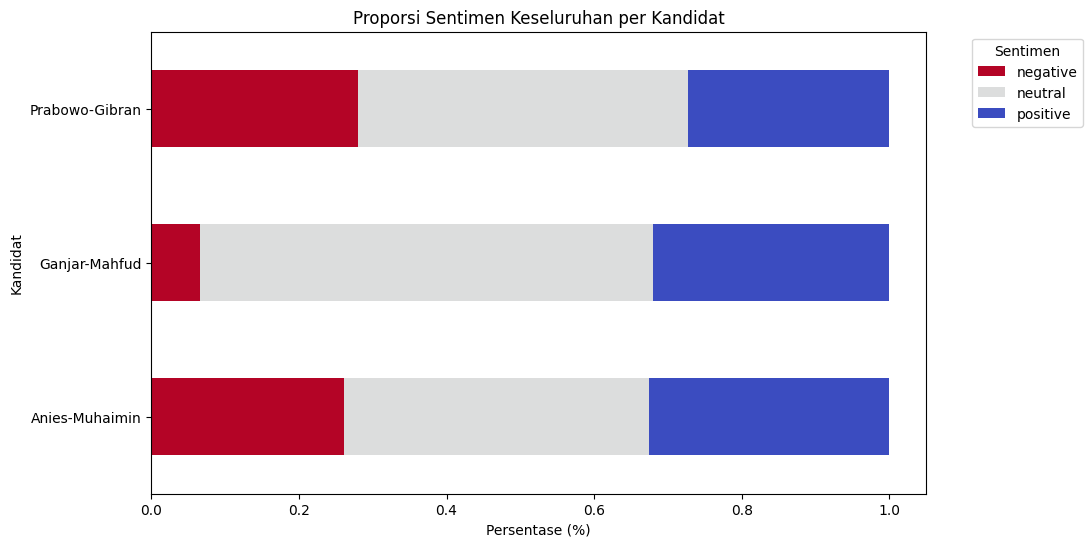

In [ ]:
sentiment_crosstab = pd.crosstab(
    index=df_2['kandidat'],
    columns=df_2['sentiment'],
    normalize='index'
)

sentiment_crosstab.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    colormap='coolwarm_r',
    title='Proporsi Sentimen Keseluruhan per Kandidat'
)
plt.xlabel('Persentase (%)')
plt.ylabel('Kandidat')
plt.legend(title='Sentimen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

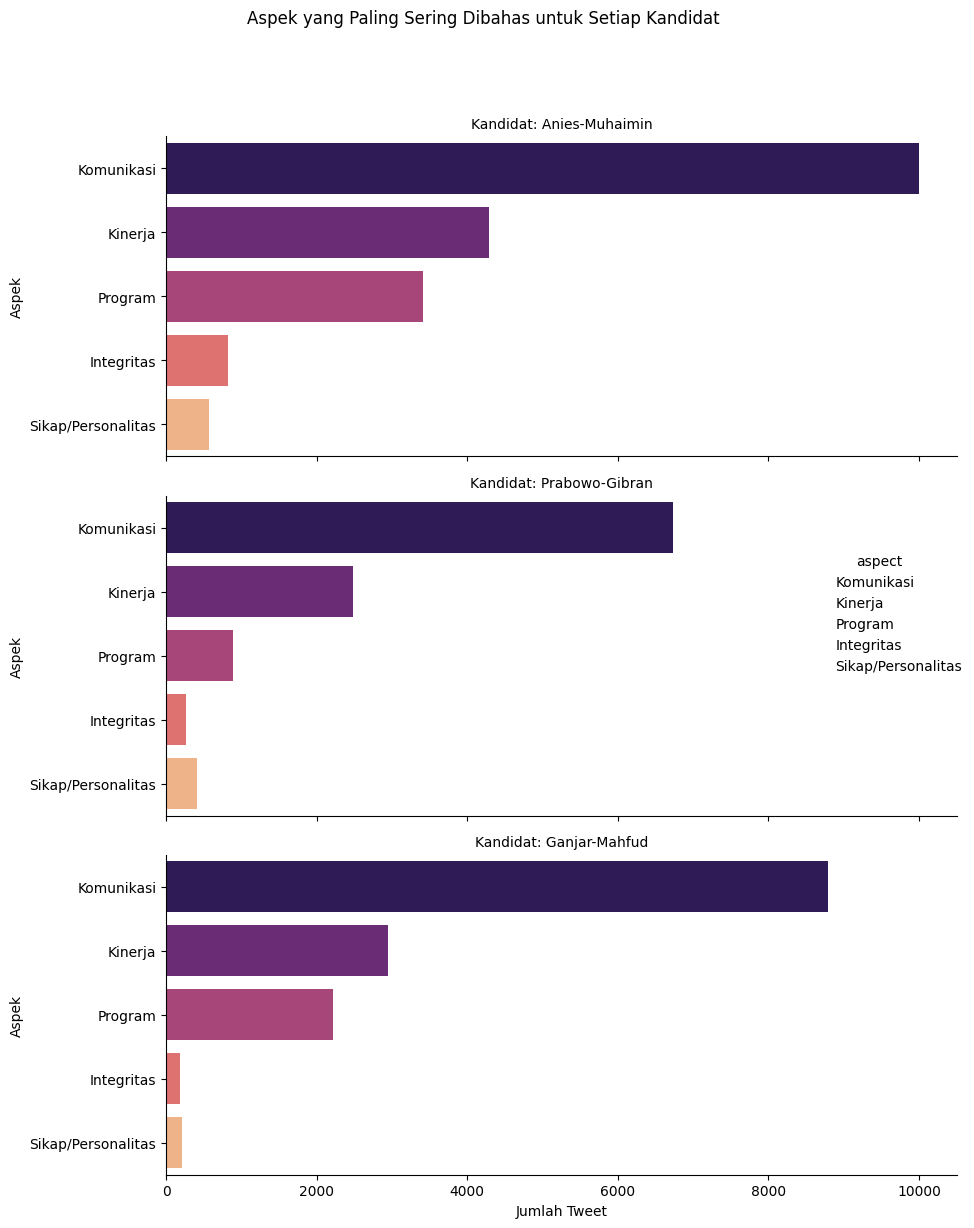

In [ ]:
g = sns.catplot(
    data=df_2,
    y="aspect",
    col="kandidat",
    kind="count",
    col_wrap=1,
    height=4, aspect=2,
    sharey=False,
    palette='magma',
    order=df_2['aspect'].value_counts().index
)
g.fig.suptitle('Aspek yang Paling Sering Dibahas untuk Setiap Kandidat', y=1.02)
g.set_axis_labels("Jumlah Tweet", "Aspek")
g.set_titles("Kandidat: {col_name}")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

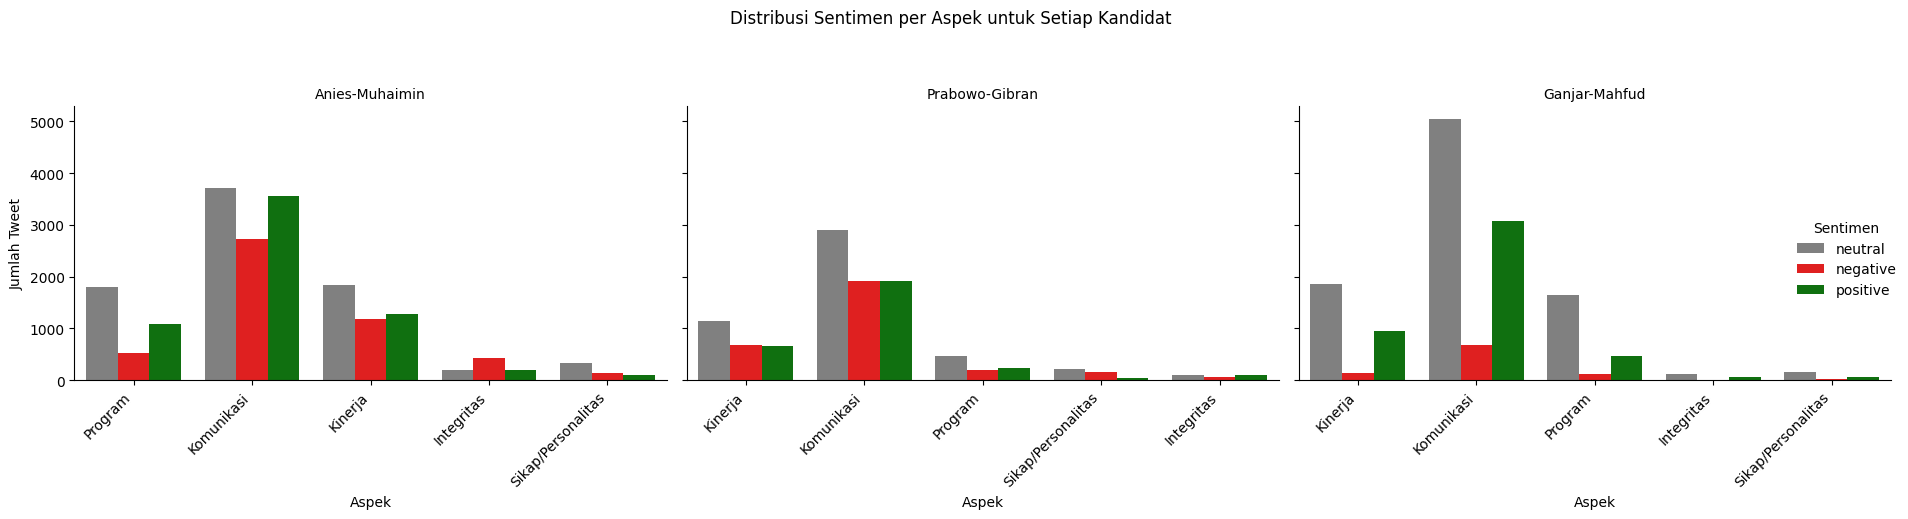

In [ ]:
g = sns.catplot(
    data=df_2,
    x='aspect',
    hue='sentiment',
    col='kandidat',
    kind='count',
    col_wrap=3,
    height=5, aspect=1.2,
    sharex=False,
    palette={'positive': 'green', 'negative': 'red', 'neutral': 'grey'}
)
g.fig.suptitle('Distribusi Sentimen per Aspek untuk Setiap Kandidat', y=1.03)
g.set_axis_labels("Aspek", "Jumlah Tweet")
g.set_xticklabels(rotation=45, ha='right')
g.set_titles("{col_name}")
g.legend.set_title('Sentimen')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

* **Aspect extraction -> dari keyword ( pake keybert ) di map ke masing masing predefined aspect pake cosine sim**

* **sentiment -> pretrained bert sentiment model**

* **kandidat per content -> ambil manual ( contoh : cek apakah ada kata anies di content kalo iya maka kandidat = anies )**

# Kesimpulan dari AI wkwkkw

Tentu, berikut adalah analisis Anda yang disajikan dalam format Markdown yang lebih terstruktur dan mudah dibaca.

---

# Analisis Sentimen Digital Pemilihan Presiden

> Berdasarkan analisis visual, narasi digital selama periode ini didominasi oleh pasangan **Anies-Muhaimin** dari segi volume percakapan. Namun, pasangan **Ganjar-Mahfud** secara konsisten unggul dalam hal sentimen positif di hampir semua aspek, menjadikan mereka "juara sentimen" dalam diskursus online. Sementara itu, **Prabowo-Gibran** menghadapi tantangan ganda, yaitu volume pembicaraan yang paling rendah dan proporsi sentimen negatif yang tinggi.

---

## 1. Volume Pembicaraan vs. Kualitas Sentimen

Grafik "Volume Pembicaraan per Kandidat" menunjukkan bahwa **Anies-Muhaimin** adalah pasangan yang paling banyak diperbincangkan, menghasilkan *buzz* paling tinggi di media sosial. Namun, volume yang tinggi ini tidak selalu berarti dukungan.

Grafik "Proporsi Sentimen Keseluruhan" mengungkapkan kualitas dari pembicaraan tersebut. Di sini terlihat jelas bahwa:

* **Ganjar-Mahfud** memiliki profil sentimen yang paling sehat, dengan porsi sentimen negatif yang sangat kecil dan porsi positif yang solid.
* **Anies-Muhaimin** dan **Prabowo-Gibran** sama-sama menghadapi porsi sentimen negatif yang signifikan (sekitar 25-30% dari total percakapan mereka). Ini menunjukkan bahwa meskipun Anies-Muhaimin banyak dibicarakan, sebagian besar percakapan tersebut bersifat netral atau bahkan menyerang.

---

## 2. Fokus Pembicaraan: Gaya Komunikasi Mendominasi Substansi

Grafik "Aspek yang Paling Sering Dibahas" memberikan *insight* krusial tentang apa yang menjadi fokus utama warganet.

Untuk semua kandidat, aspek **'Komunikasi'** (meliputi debat, gaya bicara, orasi) adalah topik yang jauh mendominasi percakapan. Aspek substantif seperti **'Program'** dan **'Integritas'** dibicarakan jauh lebih sedikit.

Hal ini mengindikasikan bahwa diskursus publik online lebih terfokus pada **"gaya"** dan performa kandidat saat tampil di depan publik, daripada mendalami substansi kebijakan atau rekam jejak integritas mereka.

---

## 3. Analisis Mendalam: Kunci Kekuatan dan Kelemahan Tiap Kandidat

Visualisasi "Distribusi Sentimen per Aspek" adalah kunci untuk memahami "mengapa" profil sentimen setiap kandidat bisa terbentuk seperti itu.

### Anies-Muhaimin
* **Kekuatan**: Volume pembicaraan tertinggi, terutama pada aspek **'Komunikasi'**.
* **Kelemahan**: Aspek 'Komunikasi' mereka bersifat sangat polarisasi, dengan jumlah sentimen negatif yang hampir menyaingi sentimen positif. Selain itu, sentimen untuk aspek **'Kinerja'** dan **'Program'** mereka cenderung lebih banyak negatif daripada positif. Tantangan utamanya adalah mengubah volume percakapan yang tinggi menjadi sentimen positif.

### Prabowo-Gibran
* **Kekuatan**: Sulit diidentifikasi dari data ini, karena volume di semua aspek lebih rendah dari kandidat lain.
* **Kelemahan**: Menghadapi sentimen negatif yang tinggi pada aspek utama mereka, yaitu **'Komunikasi'**. Mereka juga gagal menghasilkan volume percakapan yang signifikan terkait **'Program'** dan **'Kinerja'**, dan yang ada pun cenderung negatif.

### Ganjar-Mahfud
* **Kekuatan**: Unggul telak pada aspek yang paling banyak dibicarakan, yaitu **'Komunikasi'**, di mana sentimen positif jauh melampaui sentimen negatif. Keunggulan ini juga konsisten pada aspek **'Kinerja'** dan **'Program'**. Inilah yang menjadi sumber utama profil sentimen keseluruhan mereka yang sangat positif.
* **Kelemahan**: Volume pembicaraan mereka masih berada di bawah Anies-Muhaimin.

---

## Kesimpulan Akhir

Secara keseluruhan, data menunjukkan sebuah pertarungan narasi di mana setiap kandidat memiliki posisi yang unik. **Anies-Muhaimin** berhasil menjadi pusat perhatian, namun gagal mengonversinya menjadi sentimen positif. **Prabowo-Gibran** kesulitan mendapatkan traksi baik dari segi volume maupun sentimen. Sementara itu, **Ganjar-Mahfud**, meskipun tidak menjadi yang paling ramai dibicarakan, berhasil membangun persepsi publik yang paling positif di hampir semua lini diskusi utama, menjadikan strategi komunikasi dan penekanan pada kinerja mereka sangat efektif di ranah digital.